# Henry Gu - Machine Learning - Homework 1 - Linear Regression

## Dataset
The dataset you will be using is the "Bike Sharing". 

Features:
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

Target:
- cnt: count of total rental bikes

Your goal is to predict the number of total rental bikes (cnt) based on the features.

## Load Packages

In [1]:
import csv
import numpy as np
import pandas as pd

## Load the data

In [2]:
from sklearn.model_selection import train_test_split
BikeSharing_df = pd.read_csv('BikeSharing.csv')
BikeSharing_training_df, BikeSharing_test_df = train_test_split(BikeSharing_df, test_size=BikeSharing_df.shape[0]//3)
BikeSharing_training_df.reset_index(drop=True, inplace=True)
BikeSharing_test_df.reset_index(drop=True, inplace=True)
BikeSharing_training_df

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,4,10,8,0,1,1,2,0.46,0.4545,0.77,0.1045,784
1,4,10,13,0,4,1,1,0.50,0.4848,0.45,0.5821,164
2,1,12,10,0,5,1,1,0.32,0.2879,0.42,0.4627,154
3,2,6,23,0,1,1,2,0.70,0.6515,0.58,0.2239,80
4,1,12,13,0,6,0,1,0.34,0.3030,0.39,0.2985,121
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,4,0,5,1,3,0.32,0.2879,0.70,0.4925,3
196,4,10,10,0,2,1,2,0.56,0.5303,0.68,0.0000,102
197,1,2,12,0,6,0,2,0.30,0.3182,0.70,0.0896,300
198,4,10,3,0,3,1,1,0.44,0.4394,0.67,0.2239,3


## Data exploration

#### Plot Histogram for key features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271D6AA4F40>]],
      dtype=object)

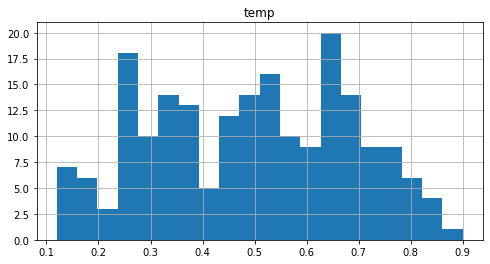

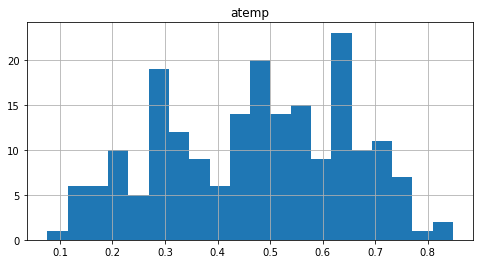

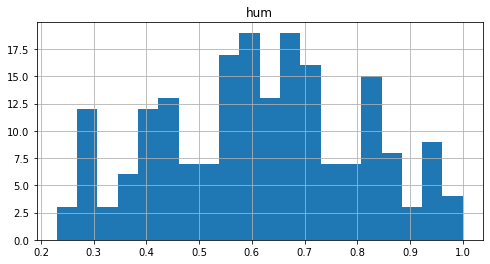

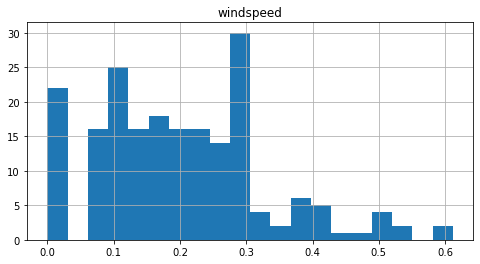

In [3]:
BikeSharing_training_df.hist('temp', figsize=(8,4), bins=20)
BikeSharing_training_df.hist('atemp', figsize=(8,4), bins=20)
BikeSharing_training_df.hist('hum', figsize=(8,4), bins=20)
BikeSharing_training_df.hist('windspeed', figsize=(8,4), bins=20)

#### Correlation Matrix

In [4]:
BikeSharing_training_df.corr()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.768646,-0.081656,-0.056929,-0.015039,0.118113,0.084922,0.397819,0.402925,0.145503,-0.061425,0.218879
mnth,0.768646,1.000000,-0.031304,0.023308,-0.001044,0.081537,0.117660,0.226956,0.223380,0.145388,0.024610,0.101442
hr,-0.081656,-0.031304,1.000000,0.090689,0.064977,-0.127541,-0.126770,0.029084,0.022673,-0.348371,0.175927,0.384398
holiday,-0.056929,0.023308,0.090689,1.000000,-0.059305,-0.215648,-0.048278,0.029527,0.032520,-0.031970,-0.067300,0.007840
weekday,-0.015039,-0.001044,0.064977,-0.059305,1.000000,0.090577,-0.094669,-0.053125,-0.066833,-0.089447,0.122046,0.114049
workingday,0.118113,0.081537,-0.127541,-0.215648,0.090577,1.000000,0.156738,-0.003076,0.001255,0.145645,-0.027419,-0.174498
weathersit,0.084922,0.117660,-0.126770,-0.048278,-0.094669,0.156738,1.000000,0.006751,0.010067,0.396515,-0.045003,-0.170084
temp,0.397819,0.226956,0.029084,0.029527,-0.053125,-0.003076,0.006751,1.000000,0.993816,-0.035468,-0.045070,0.416673
atemp,0.402925,0.223380,0.022673,0.032520,-0.066833,0.001255,0.010067,0.993816,1.000000,-0.008790,-0.069220,0.408348
hum,0.145503,0.145388,-0.348371,-0.031970,-0.089447,0.145645,0.396515,-0.035468,-0.008790,1.000000,-0.205732,-0.322561


## Data Processing

### Standardization of features

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(BikeSharing_training_df[['temp', 'atemp', 'hum', 'windspeed']])
pd.DataFrame(scaler.transform(BikeSharing_training_df[['temp', 'atemp', 'hum', 'windspeed']]), columns=['temp', 'atemp', 'hum', 'windspeed']).head()

,temp,atemp,hum,windspeed
0,-0.176067,-0.097232,0.816476,-0.734761
1,0.028069,0.075917,-0.890629,3.015785
2,-0.890541,-1.049266,-1.050670,2.078149
3,1.048746,1.028523,-0.197117,0.202876
4,-0.788473,-0.962978,-1.210711,0.788702


### One-Hot Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
BikeSharing_training_enc = OneHotEncoder(drop='first').fit(BikeSharing_training_df[categorical_columns])

In [7]:
# Transform Training Data
BikeSharing_training_enc_out = BikeSharing_training_enc.transform(BikeSharing_training_df[categorical_columns])
BikeSharing_training_enc_out = pd.DataFrame(BikeSharing_training_enc_out.toarray())

col_labels = []
for col, labels in zip(categorical_columns, BikeSharing_training_enc.categories_):
    for i in range(1, len(labels)):
        col_labels.append(str(col + '_' + str(labels[i])))
BikeSharing_training_enc_out.columns = col_labels
BikeSharing_training_enc_out

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
197,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# Transform Test Data
BikeSharing_test_enc_out = BikeSharing_training_enc.transform(BikeSharing_test_df[categorical_columns])
BikeSharing_test_enc_out = pd.DataFrame(BikeSharing_test_enc_out.toarray())

col_labels = []
for col, labels in zip(categorical_columns, BikeSharing_training_enc.categories_):
    for i in range(1, len(labels)):
        col_labels.append(str(col + '_' + str(labels[i])))
BikeSharing_test_enc_out.columns = col_labels
BikeSharing_test_enc_out

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
97,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Collect processed data

In [9]:
BikeSharing_training_processed = pd.concat([BikeSharing_training_enc_out, BikeSharing_training_df[['temp', 'atemp', 'hum', 'windspeed']]], axis=1)
BikeSharing_training_processed

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.46,0.4545,0.77,0.1045
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.4848,0.45,0.5821
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.32,0.2879,0.42,0.4627
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.70,0.6515,0.58,0.2239
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.34,0.3030,0.39,0.2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.32,0.2879,0.70,0.4925
196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.56,0.5303,0.68,0.0000
197,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.30,0.3182,0.70,0.0896
198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.44,0.4394,0.67,0.2239


In [10]:
BikeSharing_test_processed = pd.concat([BikeSharing_test_enc_out, BikeSharing_test_df[['temp', 'atemp', 'hum', 'windspeed']]], axis=1)
BikeSharing_test_processed

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.42,0.4242,0.67,0.1940
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.26,0.2727,0.56,0.1045
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.3939,0.40,0.2239
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.12,0.1515,0.93,0.1343
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.66,0.6061,0.83,0.3582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.4697,0.72,0.0896
96,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.72,0.6515,0.45,0.1343
97,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.34,0.3182,0.49,0.2239
98,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.52,0.5000,0.29,0.3582


## Develop Naive Multiple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Building and fitting the Linear Regression model 
X_train = np.asarray(BikeSharing_training_processed)
y_train = np.array(BikeSharing_training_df['cnt']).reshape(-1, 1)
lm = LinearRegression().fit(X_train, y_train)

In [13]:
# Evaluating the Linear Regression model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def adjusted_r2(r2, n, k):
    return 1 - (((1 - r2) * (n - 1)) / (n - k - 1))

print('Mean Squared Error:', mean_squared_error(y_train, lm.predict(X_train)))
print('R2 Score:', r2_score(y_train, lm.predict(X_train)))
print('Adjusted R2 Score:', adjusted_r2(r2_score(y_train, lm.predict(X_train)), X_train.shape[0], X_train.shape[1]))

Mean Squared Error: 9634.755205549971
R2 Score: 0.7160803089695827
Adjusted R2 Score: 0.6182431181415335


## Develop the best Multiple Linear Regression model using K-fold Cross-Validation

In [14]:
# Custom function for k-fold cross-validation. 
from statistics import mean
import random

def cross_val_mse(X, y, k, seed):
    # Write your code here
    mse = []

    # Create the k folds
    random.seed(seed) # seed the random number generator so every call generates the same folds
    
    # Create an array containing k blocks of indexes
    indexes = list(range(len(y)))
    random.shuffle(indexes)
    indexes = np.array_split(indexes, k)
    
    # Loop through each block of indexes
    for i in range(len(indexes)):
        
        # Append all blocks of indexes except block k into one array
        train_index = np.array([]) 
        for j in range(len(indexes)):
            if i != j:
                train_index = np.concatenate([train_index, indexes[j]], axis=0) if train_index.size else indexes[j]
        
        # Set training and validation set for X
        X_train = X[train_index] # Use all blocks of indexes except those in block i for the training set
        X_test = X[indexes[i]] # use block i of indexes for validation set
        
        # Reshape into a (1,) array if necessary
        if len(X.shape) == 1:
            X_train.reshape(-1,1)
            X_test.reshape(-1,1)
        
        # Set training and validation set for y
        y_train = y[train_index].reshape(-1,1)
        y_test = y[indexes[i]].reshape(-1,1)
        
        # Calculate MSE
        lm = LinearRegression().fit(X_train, y_train)
        mse.append(mean_squared_error(y_test, lm.predict(X_test)))
        
    return(mean(mse))

In [15]:
from itertools import combinations

seed = 45
k = 5 

categorical_features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'] 
continuous_features= ['temp', 'atemp', 'hum', 'windspeed']

# Create a dictionary for all available features
features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

results = {}
for i in range(1, len(features) + 1): # loop through every possible number of features (i)
    for features_subset in combinations(features, i): # loop through every combination of i features
        X = np.array([])
        key = []
        for feature in features_subset: # Loop through each feature in a given combination
            key.append(feature) # Add the feature into a list which will set the key
            feature_data = np.asarray(BikeSharing_training_processed[[col for col in BikeSharing_training_processed.columns if col.startswith(feature)]])
            X = np.concatenate([X, feature_data], axis=1) if X.size else feature_data # If/Else included to address first iteration appending to an empty array
        results[" ".join(key)] = cross_val_mse(X, y_train, k, seed) # Calculate the average MSE for each combination of features

In [16]:
# Print the best features 
# Set the number of feature combinations we want to display
num_combinations = 10

# Display the top feature combinations based on lowest average MSE
count = 0
print(f'{"Features":75}{"MSE":8}')
print('-'*83)
for k, v in sorted(results.items(), key=lambda x:x[1]):
    print(f'{", ".join(k.split()):<75}{v:>7.2f}')
    
    if count > num_combinations:
        break
    
    count += 1

Features                                                                   MSE     
-----------------------------------------------------------------------------------
hr, weathersit, temp                                                       17111.53
hr, weathersit, atemp                                                      17132.48
hr, weathersit, temp, windspeed                                            17141.81
season, hr, weathersit, temp                                               17161.59
season, hr, weathersit, temp, atemp                                        17163.00
season, hr, weathersit, temp, hum                                          17165.79
hr, weathersit, atemp, windspeed                                           17185.74
season, hr, holiday, weathersit, temp, atemp                               17193.68
season, hr, holiday, weathersit, temp                                      17206.52
season, hr, holiday, weathersit, temp, hum                                 1

## Create the model with the lowest MSE and generate test set metrics

In [17]:
# Get features in best model
best_model_cols = sorted(results.items(), key=lambda x:x[1])[0][0].split()

In [18]:
# Generate training and test set
X_train = np.array([])
X_test = np.array([])
for feature in best_model_cols:
    feature_data_train = np.asarray(BikeSharing_training_processed[[col for col in BikeSharing_training_processed.columns if col.startswith(feature)]])
    X_train = np.concatenate([X_train, feature_data_train], axis=1) if X_train.size else feature_data_train
    
    feature_data_test = np.asarray(BikeSharing_test_processed[[col for col in BikeSharing_test_processed.columns if col.startswith(feature)]])
    X_test = np.concatenate([X_test, feature_data_test], axis=1) if X_test.size else feature_data_test
X_train.shape, X_test.shape

((200, 26), (100, 26))

In [19]:
# Train the model on training data
lm = LinearRegression().fit(X_train,y_train)
print('Training Set Mean Squared Error:', mean_squared_error(y_train, lm.predict(X_train)))
print('Training Set R2 Score:', r2_score(y_train, lm.predict(X_train)))
print('Training Set Adjusted R2 Score:', adjusted_r2(r2_score(y_train, lm.predict(X_train)), X_train.shape[0], X_train.shape[1]))

Training Set Mean Squared Error: 11220.439355345005
Training Set R2 Score: 0.6693529200243711
Training Set Adjusted R2 Score: 0.6196602952881494


In [20]:
# Evaluate the model
y_test = np.array(BikeSharing_test_df['cnt']).reshape(-1, 1)
print('Test Set Mean Squared Error:', mean_squared_error(y_test, lm.predict(X_test)))
print('Test Set R2 Score:', r2_score(y_test, lm.predict(X_test)))
print('Test Set Adjusted R2 Score:', adjusted_r2(r2_score(y_test, lm.predict(X_test)), X_test.shape[0], X_test.shape[1]))

Test Set Mean Squared Error: 16481.998773317828
Test Set R2 Score: 0.5419842208934451
Test Set Adjusted R2 Score: 0.37885531326645294
